<a href="https://colab.research.google.com/github/Jonyeock/extract-text-from-image/blob/master/Contours_boundingRect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show>

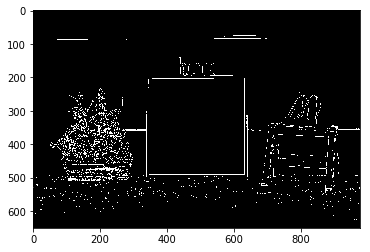

In [66]:
img = cv2.imread('indoor.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.medianBlur(img, 5)

th1 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 3, 12)

plt.imshow(th1, 'gray')
plt.show

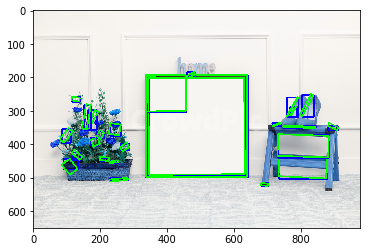

In [68]:
image, contours, hierarchy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# print(contours[2].size)
# print(len(contours))
for cnt in range(len(contours)):
  x, y, w, h = cv2.boundingRect(contours[cnt])
  if w > 20 and h > 5:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 3)

    rect = cv2.minAreaRect(contours[cnt])
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(img, [box], 0, (0, 255, 0), 3)
    plt.imshow(img, 'gray')
    plt.show